In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='../data'
dataType='train_v2'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=2.20s)
creating index...
index created!


In [4]:
print('categories ：',len(coco.dataset['categories']))
print('images     ：',len(coco.dataset['images']))
print('annotations：',len(coco.dataset['annotations']))

categories ： 1
images     ： 42556
annotations： 81689


In [5]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
ship



In [22]:
catIds = coco.getCatIds(catNms=['ship']);
imgIds = coco.getImgIds(catIds=catIds );

file_name: e1894c983.jpg


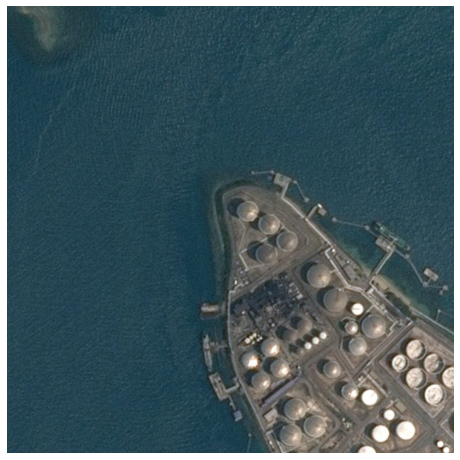

In [23]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

print('file_name:',img['file_name'])

# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

2 ships.


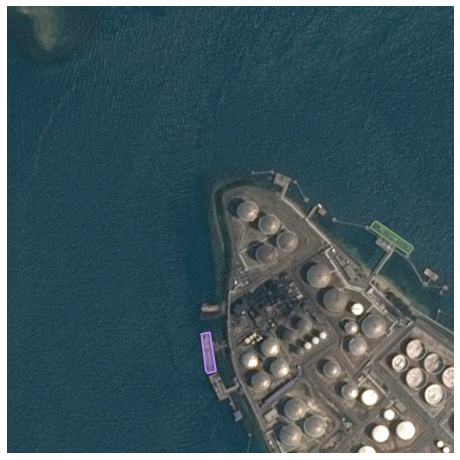

In [24]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print("%d ships."%len(anns))
coco.showAnns(anns)